<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Loading data into Pyleoclim

by [Jordan Landers](https://orcid.org/0000-0001-9772-7617), [Deborah Khider](https://orcid.org/0000-0001-7501-8430), [Julien Emile-Geay](https://orcid.org/0000-0001-5920-4751).


## Preamble
Contrary to common beliefs, Pyleoclim is not specific to the LiPD file ecosystem.  The object at the heart of the package is the
[`Series` object](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#series-pyleoclim-series), which describes the fundamentals of a time series. To create a
Pyleoclim `Series`, we first need to load the data set, and then specify values for its various properties:

* `time`: Time values for the time series
* `value`: Paleo values for the time series
* `time_name` (optional): Name of the time vector, (e.g., 'Time', 'Age'). This is used to label the x-axis on plots
* `time_unit` (optional): The units of the time axis (e.g., 'years')
* `value_name` (optional): The name of the paleo variable (e.g., 'Temperature')
* `value_unit` (optional): The units of the paleo variable (e.g., 'deg C')
* `label` (optional): Name of the time series (e.g., 'Nino 3.4')
* `log` (dict) – Dictionary of tuples documentating the various transformations applied to the object
* `keep_log` (bool) – Whether to keep a log of applied transformations. False by default
* `importedFrom` (string) – source of the dataset. If it came from a LiPD file, this could be the datasetID property
* `archiveType` (string) – climate archive
* `dropna` (bool) – Whether to drop NaNs from the series to prevent downstream functions from choking on them defaults to True
* `sort_ts` (str) – Direction of sorting over the time coordinate; ‘ascending’ or ‘descending’ Defaults to ‘ascending’
* `verbose` (bool) – If True, will print warning messages if there is any
* `clean_ts` (optional): set to True to remove the NaNs and make time axis strictly prograde with duplicated timestamps reduced by averaging the values Default is None.

Data may be stored in different file types, which can be ingested in different ways.

### Goals:
* Create Pyleoclim Series objects from datasets stored as CSV, NetCDF, LiPD, and NOAA txt files. 

**Reading Time:** 5 minutes

### Keywords

CSV; NetCDF; LiPD, Series; EnsembleSeries; MultipleSeries

### Pre-requisites

None. This tutorial assumes basic knowledge of Python. If you are not familiar with this coding language, check out this tutorial: http://linked.earth/ec_workshops_py/.

### Relevant Packages

Pandas; Xarray; pylipd; pangaeapy

## Data Description

* McCabe-Glynn, S., Johnson, K., Strong, C. et al. Variable
North Pacific influence on drought in southwestern North America since AD 854. Nature Geosci 6, 617–621 (2013).
[doi:10.1038/ngeo1862](https://doi.org/10.1038/ngeo1862)

* Euro2k database: PAGES2k Consortium., Emile-Geay, J., McKay, N. et al. A global multiproxy database for temperature
 reconstructions of the Common Era. Sci Data 4, 170088 (2017). [doi:10.1038/sdata.2017.88](https://doi.org/10.1038/sdata.2017.88)

* Lisiecki, L. E., and Raymo, M. E. (2005), A Pliocene-Pleistocene stack of 57 globally distributed benthic
δ18O records, Paleoceanography, 20, PA1003, [doi:10.1029/2004PA001071](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2004PA001071).

## Demonstration
First we import our favorite packages:

In [2]:
%load_ext watermark

import pyleoclim as pyleo
from pylipd.lipd import LiPD
import xarray as xr
import pandas as pd
from pangaeapy.pandataset import PanDataSet

/Users/julieneg/opt/miniconda3/envs/pyleo/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


### Pre-loaded datasets
First, note that `pyleoclim` ships with a few pre-defined datasets:

In [2]:
pyleo.utils.available_dataset_names()

['SOI',
 'NINO3',
 'HadCRUT5',
 'AIR',
 'LR04',
 'AACO2',
 'EDC-dD',
 'GISP2',
 'cenogrid_d18O',
 'cenogrid_d13C']

To load one such dataset, simply type its name within `pyleo.utils.load_dataset()`, like so:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [My BP]', ylabel='$\\delta^{18} \\mathrm{O}$ [‰ VPDB]'>)

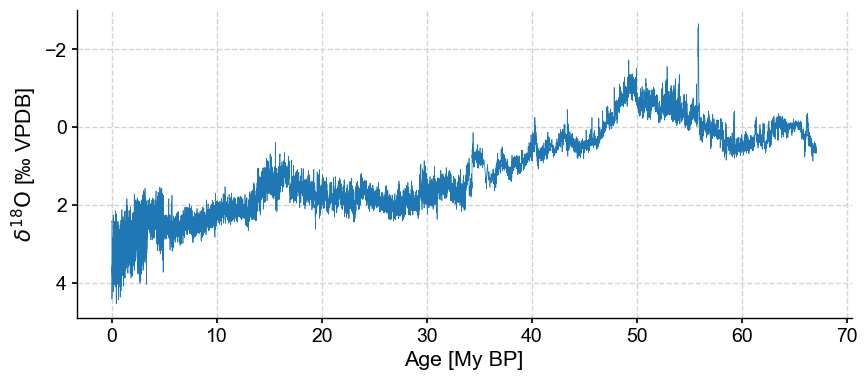

In [3]:
ts = pyleo.utils.load_dataset('cenogrid_d18O')
ts.plot(invert_yaxis=True)

Of course, there is a whole world out there full of wondrous data. How do you pull them into your Python workspace and get them to play nice with Pyleoclim? A few options below.

### LiPD
Linked Paleo Data format ([LiPD](http://www.clim-past-discuss.net/11/4309/2015/cpd-11-4309-2015-discussion.html)) files contain time series information in addition to supporting metadata (e.g., root metadata, location). 

Data stored in this format can be loaded into Python through a package called [pylipd](https://pylipd.readthedocs.io/en/latest/). Tutorials for this toolbox are available [here](https://github.com/LinkedEarth/pylipdTutorials).

##### Loading a single LiPD file

In [4]:
data_path = '../data/Crystal.McCabe-Glynn.2013.lpd'
D = LiPD()
D.load(data_path)

Loading 1 LiPD files


100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

Loaded..


You can extract each available variable and load them into a Pandas DataFrame. Each row will represent one variable:

In [5]:
d, df = D.get_timeseries(D.get_all_dataset_names(), to_dataframe=True)

df.head()

Extracting timeseries from dataset: Crystal.McCabe-Glynn.2013 ...


,mode,time_id,investigator,dataSetName,funding1_grant,funding1_agency,funding2_grant,funding2_agency,funding3_grant,funding3_agency,...,paleoData_resolution_hasMedianValue,paleoData_resolution_hasMaxValue,paleoData_hasMinValue,paleoData_variableName,paleoData_hasMeanValue,paleoData_hasMaxValue,paleoData_units,paleoData_values,paleoData_takenAtDepth,paleoData_inferredVariableType
0,paleoData,age,"[{'name': 'C. Strong'}, {'name': 'K.R. Johnson...",Crystal.McCabe-Glynn.2013,"[0823554, 1103360]",US National Science Foundation,"[0823554, 1103360]","Newkirk Center for Science and Society, Univer...",[41230524.0],National Science Foundation of China,...,-1.1,-0.7,0.05,depth,51.292647,104.40,mm,"[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0...",NaN,NaN
1,paleoData,age,"[{'name': 'C. Strong'}, {'name': 'K.R. Johnson...",Crystal.McCabe-Glynn.2013,"[0823554, 1103360]",US National Science Foundation,"[0823554, 1103360]","Newkirk Center for Science and Society, Univer...",[41230524.0],National Science Foundation of China,...,NaN,NaN,851.90,age,1427.506736,2007.70,yr AD,"[2007.7, 2007.0, 2006.3, 2005.6, 2004.9, 2004....",depth,Age
2,paleoData,age,"[{'name': 'C. Strong'}, {'name': 'K.R. Johnson...",Crystal.McCabe-Glynn.2013,"[0823554, 1103360]",US National Science Foundation,"[0823554, 1103360]","Newkirk Center for Science and Society, Univer...",[41230524.0],National Science Foundation of China,...,-1.1,-0.7,10.43,d18O,-9.021176,-7.89,permil,"[-8.01, -8.23, -8.61, -8.54, -8.6, -9.08, -8.9...",depth,NaN


The available properties are stored in the columns of the DataFrame:

In [6]:
df.columns

Index(['mode', 'time_id', 'investigator', 'dataSetName', 'funding1_grant',
       'funding1_agency', 'funding2_grant', 'funding2_agency',
       'funding3_grant', 'funding3_agency', 'hasUrl', 'createdBy',
       'lipdVersion', 'geo_meanLon', 'geo_meanLat', 'geo_meanElev', 'geo_type',
       'pub1_author', 'pub1_doi', 'pub1_pages', 'pub1_dataUrl', 'pub1_year',
       'pub1_title', 'pub1_journal', 'pub1_volume', 'pub1_abstract',
       'pub1_DOI', 'archiveType', 'tableType', 'paleoData_tableName',
       'paleoData_missingValue', 'paleoData_filename', 'depth', 'depthUnits',
       'age', 'ageUnits', 'paleoData_hasMedianValue', 'paleoData_number',
       'paleoData_proxyObservationType', 'paleoData_variableType',
       'paleoData_TSid', 'paleoData_resolution_hasMeanValue',
       'paleoData_resolution_hasMinValue',
       'paleoData_resolution_hasMedianValue',
       'paleoData_resolution_hasMaxValue', 'paleoData_hasMinValue',
       'paleoData_variableName', 'paleoData_hasMeanValue',
  

Let's see which variables are available:

In [7]:
df['paleoData_variableName'].unique()

array(['depth', 'age', 'd18O'], dtype=object)

In [10]:
df_filter=df[df['paleoData_variableName']=='d18O']
df_filter

,mode,time_id,investigator,dataSetName,funding1_grant,funding1_agency,funding2_grant,funding2_agency,funding3_grant,funding3_agency,...,paleoData_resolution_hasMedianValue,paleoData_resolution_hasMaxValue,paleoData_hasMinValue,paleoData_variableName,paleoData_hasMeanValue,paleoData_hasMaxValue,paleoData_units,paleoData_values,paleoData_takenAtDepth,paleoData_inferredVariableType
2,paleoData,age,"[{'name': 'C. Strong'}, {'name': 'K.R. Johnson...",Crystal.McCabe-Glynn.2013,"[0823554, 1103360]",US National Science Foundation,"[0823554, 1103360]","Newkirk Center for Science and Society, Univer...",[41230524.0],National Science Foundation of China,...,-1.1,-0.7,10.43,d18O,-9.021176,-7.89,permil,"[-8.01, -8.23, -8.61, -8.54, -8.6, -9.08, -8.9...",depth,NaN


Let's create a `Series` object from the information in the file:

In [11]:
ts = pyleo.Series(time=df_filter['age'].iloc[0], value=df_filter['paleoData_values'].iloc[0],
                  time_name = 'Age', time_unit = df_filter['ageUnits'].iloc[0],
                  value_name = df_filter['paleoData_variableName'].iloc[0], 
                  value_unit = df_filter['paleoData_units'].iloc[0],
                  label = df_filter['dataSetName'].iloc[0],
                  archiveType = df_filter['archiveType'].iloc[0], 
                  auto_time_params=False, verbose=False)

And plot the timeseries:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [yr AD]', ylabel='d18O [permil]'>)

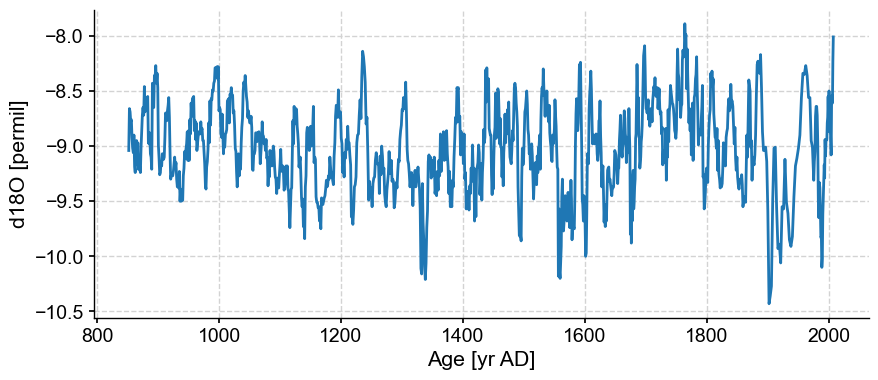

In [12]:
ts.plot()

By default, the plot will use the name/units passed to `Series` to make the plots. You can change these labels directly on the graph or update the information in the `Series` object at any time:

In [13]:
ts.time_unit = 'CE'
ts.value_name = '$\delta^{18}$O'
ts.value_unit = "'‰ VPDB"

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [CE]', ylabel="$\\delta^{18}$O ['‰ VPDB]">)

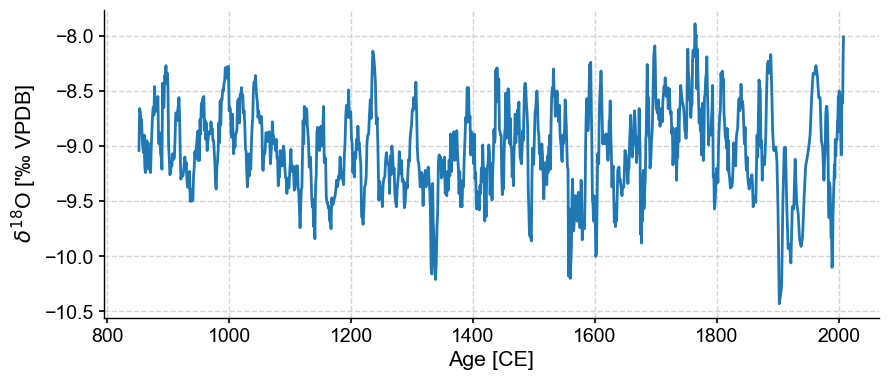

In [14]:
ts.plot()

##### Loading multiple LiPD files

In [ ]:
data_path = '../data/Euro2k/'
D_euro = LiPD()
D_euro.load_from_dir(data_path)

Let's use the same `.get_timeseries` function to load all the variables in a DataFrame:

In [ ]:
d_euro, df_euro = D_euro.get_timeseries(D_euro.get_all_dataset_names(),to_dataframe=True)

Let's have a look at the available variable names:

In [ ]:
df_euro['paleoData_variableName'].unique()

Let's filter the temperature records: 

In [ ]:
df_euro_filt = df_euro[df_euro['paleoData_variableName']=='temperature']

df_euro_filt.shape

Which leaves us with 12 timeseries. Let's iterate over the DataFrame and create a `Series` for each of these:

In [ ]:
ts_list = []

for _,row in df_euro_filt.iterrows():
    ts_list.append(pyleo.GeoSeries(time=row['year'],value=row['paleoData_values'],
                            time_name='Year',value_name=row['paleoData_variableName'],
                            time_unit=row['yearUnits'], value_unit=row['paleoData_units'],
                            lat = row['geo_meanLat'], lon = row['geo_meanLon'],
                            archiveType = row['archiveType'],
                            label=row['dataSetName']+'_'+row['paleoData_proxy'],
                            auto_time_params=False, verbose=False))  

Here I chose to keep these series into a list, which makes it easy to create a [`MultipleSeries` object](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#multipleseries-pyleoclim-multipleseries). However, you could choose to keep them in a dictionary, using the datasetname/proxy as a key.

In [ ]:
ms = pyleo.MultipleSeries(ts_list)

And plot them:

In [ ]:
ms.stackplot(figsize = [10,20])

### NetCDF
In order to load data from a NetCDF file, we will use [Xarray](https://docs.xarray.dev/en/stable/index.html).

In [ ]:
file_path = '../data/p2k_ngeo19_recons.nc'
p2k_nc = xr.open_dataset(file_path)

The coordinates of this data set are `year` and `ens`, and the temperature anamoly is contained in the variable
`LMRv2.1`. Below we extract the timeseries for the ensemble runs:

In [ ]:
variable_name = 'LMRv2.1'
ens_runs = p2k_nc.groupby('ens')

To create the `pyleo.Series`, we pass the time coordinate of the dataset, `p2k_nc.year`, as `time`, and one of the ensemble runs as `value`. It is optional to specify `time_name` and `time_unit`, and
`value_name` and `value_unit`, but doing so ensures that plot axes are properly labeled.

In [ ]:
ens_run1 = ens_runs[1].data_vars[variable_name]
p2k_ps = pyleo.Series(time=p2k_nc.year, value=ens_run1,
                      time_name='Time', time_unit='year', label = 'LMRv2.1 member #1',
                      value_name='GMST', value_unit='$^{\circ}$C', verbose=False)

In [ ]:
fig, ax = p2k_ps.plot()

However, given this is an ensemble, capturing this data in a `pyleo.EnsembleSeries` will open up opportunities for
specific analysis and visualization. In the cell below, we generate a list of `pyleo.Series` (one for each trace) for
the full set of ensemble runs in much the same way as above.

In [ ]:
%%time
ts_list = []

for im in range(len(p2k_nc.ens)):
    ens_run = ens_runs[im+1].data_vars[variable_name]
    ts_list.append(pyleo.Series(time=p2k_nc.year, value=ens_run,
                      time_name='Time', time_unit='year', verbose=False,
                      value_name='GMST', value_unit='$^{\circ}$C'))

Then we simply pass `ts_list` to `pyleo.EnsembleSeries`...

In [ ]:
ts_ens = pyleo.EnsembleSeries(ts_list)

For more detail on visualizing `pyleo.EnsembleSeries`, check out the tutorial on [Basic operations with
MultipleSeries and EnsembleSeries](L0_basic_MSES_manipulation.md), but we can use `plot_traces()` to quickly check to make sure the data seems
properly organized (by default, `plot_traces()` plots 10 randomly selected traces).

In [ ]:
fig, ax = ts_ens.plot_traces()

### CSV
CSV files have a table structure, so we will use [Pandas](https://pandas.pydata.org) and the read the data into a pandas `DataFrame`.

In [ ]:
LR04 = pd.read_csv('../data/LR04.csv', header=4)
LR04.head()

In [ ]:
LR04.columns

To create a `pyleo.Series`, we pass the `Time (ka)` column as `time` and the `Benthic d18O (per mil)` column as `value`. Note the extra space at the end of that column name! We have to work with what the interwebs give us.

In [ ]:
LR04_ps = pyleo.Series(time=LR04['Time (ka)'], value=LR04['Benthic d18O (per mil)  '],
                      time_name='Age', time_unit='ka', verbose=False,
                      value_name='$\delta^{18}$O', value_unit=u'‰')

In [ ]:
fig, ax = LR04_ps.plot(invert_yaxis=True)

Note that you would get the exact same result with `LR04_ps = pyleo.utils.load_dataset('LR04')`. Generally speaking, it is very easy to go between `Pyleoclim` and CSV files, but the file needs to have a certain structure to be properly read with the function [from_csv()](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#pyleoclim.core.series.Series.from_csv). For an example, see [this tutorial](L0_paleopandas.md). If it doesn't follow that structure, proceed as outlined above. 

### NOAA txt files

As you may now, the World Data Service for paleoclimatology, operated by NCEI/NOAA of the US Department of Commerce, hosts thousands of data files in various formats. A common one is a [templated text file](https://www.ncei.noaa.gov/pub/data/paleo/templates/noaa-wds-paleo-template-instructions.txt), containing rich data and metadata. One can treat the file as a raw text file, ignoring the header and loading the data directly into a [Pandas](https://pandas.pydata.org) `DataFrame`.

In [3]:
path = 'ftp://ftp.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt'
co2df = pd.read_csv(path, skiprows=137, sep='\t')
co2df.head()

,age_gas_calBP,co2_ppm,co2_1s_ppm
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04


Notice how `pandas` retrieved the data over the network, without needing to download a local copy of the file. However, it would work just as well if you did have such a copy on your hardrive, and you would simply replace `path` with the local file path  (everything else would stay the same). We did cheat a bit, however: we had to peak at the file to know how many header lines to skip (137). The separator (`sep`) argument is set to `'\t'`, which means "tab". It works well in this case, but we cannot guarantee that it will work on all NOAA text files.

Finally, we pull the relevant columns of this datframe into a Series object, convert the years to kyr for ease of use, and put in the relevant metadata so that we can get a well-labeled, publication-quality plot right off the bat:

In [ ]:
co2ts = pyleo.Series(time=co2df['age_gas_calBP']/1000,value= co2df['co2_ppm'],
                     time_name='Age',time_unit='kyr BP',value_name = r'$CO_2$',
                     value_unit='ppm',label='EPICA Dome C CO2', verbose=False)
co2ts.plot(color='C1')

## Loading from PANGAEA

Another major repository for paleoclimate data is [PANGAEA](https://www.pangaea.de). Here we load the dataset of [Skinner et al. (2007)](https://doi.pangaea.de/10.1594/PANGAEA.619066), using the very helpful [pangaeapy](https://github.com/pangaea-data-publisher/pangaeapy) package:

In [ ]:
ds = PanDataSet('10.1594/PANGAEA.619066')
print(ds.title)
print(ds.data.head())

Once again, this method eschewed a download, retrieving the data directly from PANGAEA's web server. Notice that all you needed was the dataset DOI, easily gleaned from the page's URL or from the contents themselves.  The `PanDataSet` is a custom data structure built on `pandas`, much in the way Pyleoclim `Series` will be in a few releases. 

One can extract the dataset column names via:

In [ ]:
ds.data.columns

In [ ]:
type(ds.data['Temp']) 

As a pandas Series object, this variable has an associated plot method:

In [ ]:
ds.data['Temp'].plot()

However, we see that the x-axis knows nothing about time; indeed, PANGAEA services a dizzying array of dataset types, and their API has to be very general. This is one reason to have a Pyleoclim Series class that knows explicitly about time. Let us create an instance here, with proper metadata that are not available in the original, barebones PANGAEA format:

In [ ]:
S07_temp = pyleo.Series(time=ds.data['Age'], value=ds.data['Temp'],
                        time_name='Age', time_unit='ka BP', verbose=False,
                        value_name='Temperature', value_unit=r'$^{\circ}$ C',
                        label = 'Skinner et al. (2007)')

In [ ]:
S07_temp.plot()

As of now, you can create this object manually, but we will soon automate this process to a large extent. Let us also load their reconstruction of seawater $\delta^{18}$O:

In [ ]:
S07_d18Osw = pyleo.Series(time=ds.data['Age'], value=ds.data['δ18O H2O'],
                      time_name='Age', time_unit='ka BP', verbose=False,
                      value_name='seawater $\delta^{18}$O', value_unit='$\perthousand$')

In [ ]:
S07_d18Osw.plot()

We can put both series into a [MultipleSeries](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#multipleseries-pyleoclim-multipleseries) object, which unlocks fun features, like `stackplot()`:

In [ ]:
ms = S07_temp & S07_d18Osw
ms.stackplot(plot_kwargs={'marker':'o'})

For more information on `MultipleSeries`, read the [documentation](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#multipleseries-pyleoclim-multipleseries) and/or follow [this tutorial](basic_MSES_manipulation.md).

## Takeway

There are multiple paths into Series, unlocking the full power of `Pyleoclim` to work with data originally stored in all manner of formats. 

In [4]:
%watermark -n -u -v -iv -w

Last updated: Mon Mar 04 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.20.0

pandas   : 2.1.4
xarray   : 2024.2.0
pyleoclim: 0.13.1b0

Watermark: 2.4.3

